In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_test = pd.read_csv('test.csv')

Загрузили данные. Проведем EDA.

In [5]:
df_train.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
df_train = df_train.replace(' ', np.nan) #заменяем пропуски на nan

In [8]:
df_train['TotalSpent'] = pd.to_numeric(df_train['TotalSpent']) 

In [9]:
df_train = df_train.dropna()

In [34]:
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns

In [37]:
num_cols

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent'], dtype='object')

In [36]:
num_cols = num_cols.drop(['Churn', 'IsSeniorCitizen'], 1)

In [38]:
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

In [51]:
target = 'Churn'

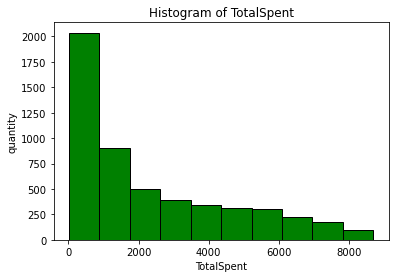

In [41]:
plt.title('Histogram of TotalSpent')
plt.xlabel('TotalSpent')
plt.ylabel('quantity')
plt.hist(df_train['TotalSpent'], color = 'green', edgecolor = 'black', bins = 10)
plt.show()

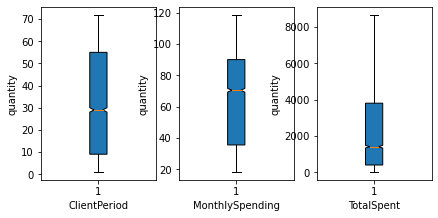

In [42]:
fig = plt.figure(figsize =(7, 7))
for i in range(len(num_cols)):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df_train[num_cols[i]], notch=True, patch_artist=True )
    plt.xlabel(num_cols[i])
    plt.ylabel('quantity')

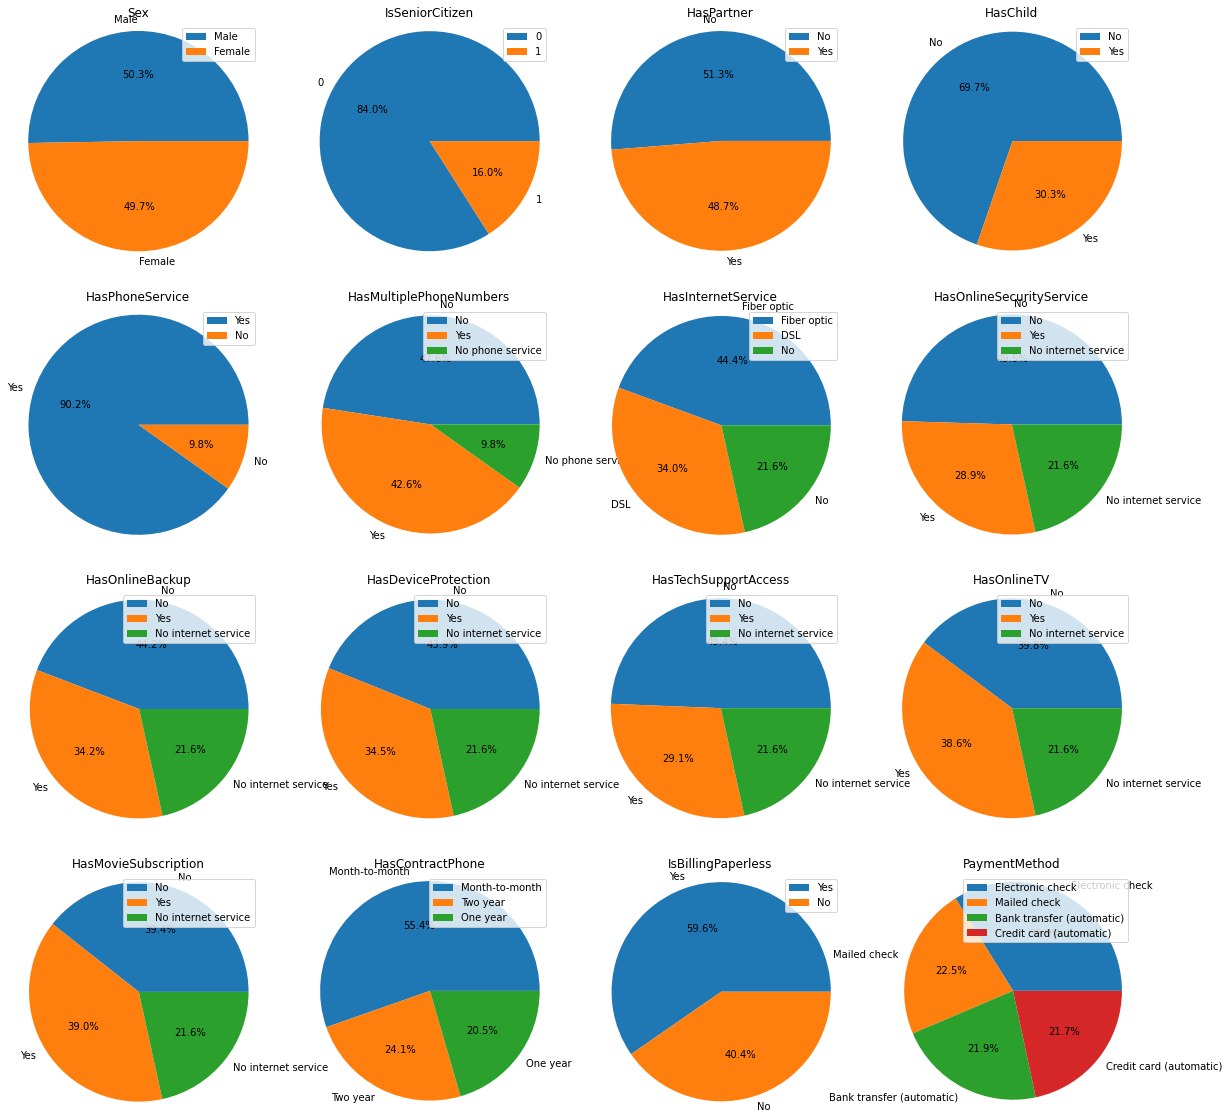

In [45]:
fig = plt.figure(figsize =(20, 20))
for i in range(len(cat_cols)):
    data_i=df_train[cat_cols[i]].value_counts()
    plt.subplot(4,4,i+1)
    plt.pie(data_i, labels = data_i.index, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(cat_cols[i])
    plt.legend()

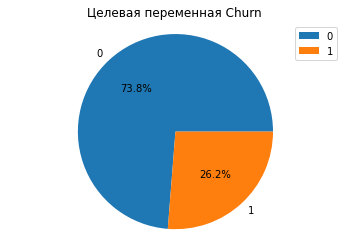

In [47]:
y_count=df_train['Churn'].value_counts()
plt.pie(y_count, labels = y_count.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Целевая переменная Churn')
plt.legend()
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, make_scorer,roc_curve
from sklearn.model_selection import cross_validate

In [52]:
numeric_data = df_train[num_cols]#отдельно сохраняем датасет числовых признаков
categorial_data = df_train[cat_cols]#отдельно сохраняем датасет категориальных признаков
dummy_features = pd.get_dummies(categorial_data)#one-hot-encoding
X = pd.concat([numeric_data, dummy_features], axis=1)#матрица признаков с one-hot-encoding
X_origin = df_train.iloc[:, :-1]#матрица признаков ориганальная
y = df_train[target]#сохраняем вектор целевых переменных
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)#разделим выборку на test/train

cls = make_pipeline(StandardScaler(),LogisticRegression())#модель логистической регресии 
param_grid = {'logisticregression__C': np.array([100, 10, 1, 0.1, 0.01, 0.001])}
search = GridSearchCV(cls, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)
print(search.best_estimator_)

{'logisticregression__C': 10.0}
0.8447388460416845
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=10.0))])


In [1]:
import catboost
from catboost import CatBoostClassifier

In [ ]:
X_train_origin, X_test_origin, y_train, y_test= train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)#Разделим данные на test & train
boosting_model =catboost.CatBoostClassifier(cat_features=categorical_indices, 
                                            random_seed=42, verbose=False)
grid={'learning_rate': np.arange(0.01, 0.2, 0.01),
      'depth': [2, 4, 6, 8, 10],
      'l2_leaf_reg': [1, 3, 5, 7, 9],
      'iterations' : [100, 200, 300]} #Сетка параметров 
grid_search_result = boosting_model.grid_search(grid, 
                           X_train_origin, 
                           y_train, 
                           plot=True, refit=True);#поиск по сетке лучших параметров learning_rate, depth, l2_leaf_reg, iterations(количество деревьев)

In [ ]:
submission = pd.read_csv(INPUT + "submission.csv")

submission[target_col] = y_pred_lr
submission.to_csv('./m_submission.csv', index=False)